# Supervised learning- regression- knn and penalisation

We work further on the same dataset as last labo: the housing dataset. The first steps (looking at the data, test/train-split and standardisation are already done for you in the code below.

## 0. Loading packages and dataset

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('real_estate_cleaned.csv')

# 1. Take a look at the data

In [19]:
df.shape

(803, 39)

In [20]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,nightlife,cafes,...,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition,roof_Gravel/rock,roof_Missing,roof_Other,roof_Shake shingle,basement_1.0,basement_Missing
0,12.597611,1,1,6.371612,2013,8.388054,4.682131,2.302585,3.433987,2.995732,...,0,1,0,0,0,1,0,0,0,1
1,12.285350,1,1,6.418365,1965,8.388054,4.663439,2.772589,1.945910,2.639057,...,0,0,0,1,0,0,0,0,1,0
2,12.542191,1,1,6.423247,1963,8.388054,5.214936,2.639057,3.465736,3.433987,...,0,1,0,0,0,1,0,0,0,1
3,12.847666,1,1,6.428105,2000,10.420554,5.293305,2.302585,3.663562,3.258097,...,0,1,0,0,0,1,0,0,0,1
4,12.736704,1,1,6.453625,1992,8.388054,5.010635,2.079442,3.135494,3.044522,...,0,0,0,0,0,1,0,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tx_price                            803 non-null    float64
 1   beds                                803 non-null    int64  
 2   baths                               803 non-null    int64  
 3   sqft                                803 non-null    float64
 4   year_built                          803 non-null    int64  
 5   lot_size                            803 non-null    float64
 6   restaurants                         803 non-null    float64
 7   groceries                           803 non-null    float64
 8   nightlife                           803 non-null    float64
 9   cafes                               803 non-null    float64
 10  shopping                            803 non-null    float64
 11  arts_entertainment                  803 non-n

# 2 Train/test-split and standardisation


In [22]:
# shuffle
from random import Random
df_shuffle = df.sample(frac=1, random_state=123)

# split
from sklearn.model_selection import train_test_split

X = df_shuffle.drop(columns='tx_price')
y = df_shuffle['tx_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# standardise
from sklearn.preprocessing import StandardScaler

num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[num_feat])


X_train_stan = X_train.copy()
X_test_stan = X_test.copy()
X_train_stan[num_feat] = scaler.transform(X_train[num_feat])
X_test_stan[num_feat] = scaler.transform(X_test[num_feat])



# 3. Nearest neighbors
## 3.1. Radius Neighbors Regression

1. Perform a crossvalidation, using radius neighbors regression, with the radius ranging from 1 to 10
    + Does it work?
    + Why (not)?
2. Search for the minimum radius that does work and do a crossvalidation with 10 values. 
    + E.g if it works at radius 5, let the radius range from 5 to 15.
    + Draw a plot that plots the radius against the R2
    + Is your best model a good model: is it underfitted or overfitted?
    + Is RNN a good method to use when there are a lot of features?

1. Crossvalidation from 1 to 10.

In [23]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(1,10,3)    # This will give an array of numbers between 1 and 20
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the 11 possible values for the radius (bandwith)
for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train_stan, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 

C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-p

It does not work, because there are simply no neighbors with a radius of 1. This is an example of the curse of high dimensionality. As there are more and more features, all points tend to further and further away from each other. The lowest radius that works is 7 (or at least a number between 6 and 7).

2. Crossvalidation that works.

In [24]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(7,17,10)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the 11 possible values for the radius (bandwith)
for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train_stan, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

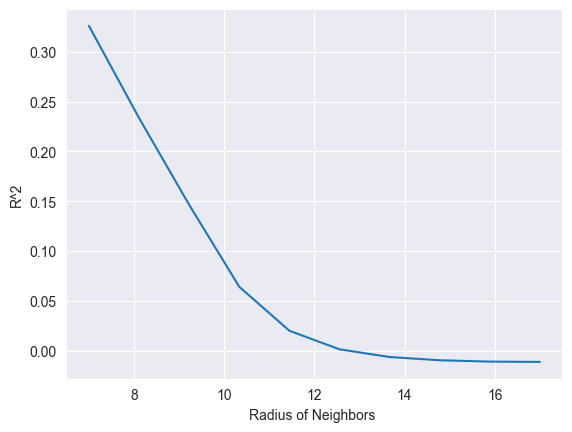

In [25]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(Radius, cv_scores)
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')

plt.show()

We can clearly see that the R2 of the model drops as the radius increases. This is because our model becomes more and more underfitted. It is already underfitted at a radius of 7, but we can't reduce the radius, or we don't have enough neigbors. This is again the curse of dimensionality at work. This clearly shows RNN breaks down as the dimensionality increases. Maybe knn will work better, since there we  do not define the distance, but the number of neighbors itself.

## 3.2 K-nearest Neighbors
1. Perform a crossvalidation, using k-nearest neighbors regression, with k ranging from 1 to 65
    
2. Plot the number of neighbors (k) to the R2
    + Also draw the lower boundary of the confidene interval of the maximum R2(maximum R2 - 1.96 * sd(of maximum R2) )
    + First do a general plot
    + Then zoom in on the highest values 
    + Which k leads to the highest R2



1. Cross-validation

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = np.arange(1,65)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for k in K:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X_train_stan, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

2. plots

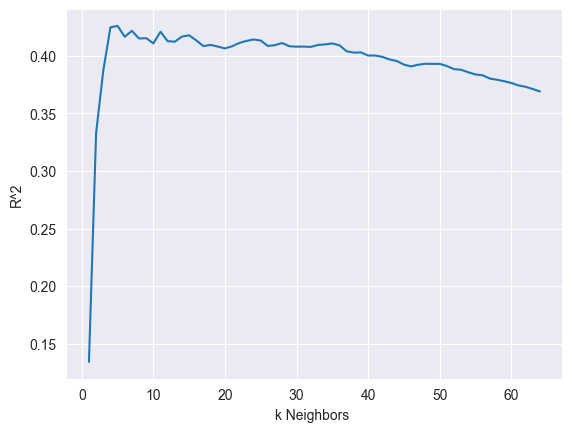

The best k is 5


In [27]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(K, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.show()
print('The best k is', K[max_index])

This plot is hard to read, so lets focus on values 2 to 30, because using more than 30 neighbors clearly leads to underfitting

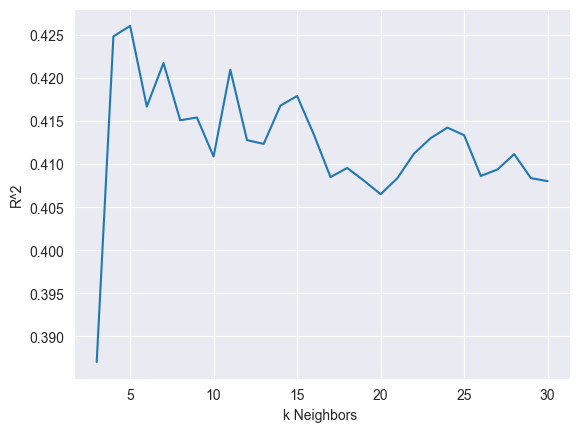

The best k is 5
The best validation score is 0.4260393299973175


In [28]:

plt.plot(K[2 : 30],cv_scores[2 :30])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')



plt.show()
print('The best k is', K[max_index])
print('The best validation score is', max_value)


The best k is 10, with a validation score of 0.54. This is rather low. Let's test it on the training data to see if the model in underfitted.


In [29]:
knn = KNeighborsRegressor(n_neighbors= 10)
knn.fit(X_train_stan, y_train)
knn.score(X_train_stan, y_train)

0.5532274100866279

This is also not that high, so there indeed might be underfitting

# 4. Penalisation

Untill know, we have seen that polynomial regression  leads to overfitting and knn leads to underfitting on this dataset, because of the curse of high dimensionality. Now, we will try a different approach, namely combining polynomial regression with penalisation.

1. Design polynomial features with degree 3
    + Don't forget to also transform the test data
    + Check the number of features of the new datasets: are there more observations or more features?
2. Do lasso-penalisation, using the default alpha. 
    + Use linear_model.Lasso()
    + Test on train and test set
    + Is the model overfitted or underfitted?   
    + Look at the coefficients. Does this explain the overfitting or underfitting?
3. Do a cross-validation to find the best value for alpha. Let the function choose the values for alpha itself.
    +  Would you say this model is overfitted, underfitted or neither?

1. Design polynomial features

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_stan)
X_test_poly = poly.transform(X_test_stan)
X_train_poly.shape

(642, 10660)

This gives you all features up to the third degree + all possible interactions between these terms. This results in 10660 features. While we only have 642 observations. This would lead to problems when performing a regular linear regression. Therefore, we apply lasso penalisation.

2. Lasso-penalisation

In [31]:
from sklearn import linear_model
linreg_lasso1 = linear_model.Lasso()
linreg_lasso1.fit(X_train_poly, y_train)
print('R2: %.3f' % linreg_lasso1.score(X_train_poly, y_train))
print('R2: %.3f' % linreg_lasso1.score(X_test_poly, y_test))

R2: 0.000
R2: -0.009


The R2 on the training data is very low! This looks like the model is underfitted. We take a look at the coefficients.

In [32]:
# look at the coefficients (use .coef_)
linreg_lasso1.coef_

array([ 0.,  0.,  0., ...,  0., -0.,  0.])

All coefficients are shrunken down to 0. Offcourse our model is underfitted. We do a cross-validation to find the best alpha. (We will choose 5 values between 0 and 1 (log -3 to log (0))).Normally, you would choose more values than 5, but that will take longer.

3. Cross-validation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

Alpha = np.logspace(-3,0,5)  
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for a in Alpha:
    lasso = linear_model.Lasso(a, max_iter=5000)
    scores = cross_val_score(lasso, X_train_poly, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))
 
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

train = linear_model.Lasso(Alpha[max_index], max_iter=1000)
train.fit(X_train_poly,y_train)


C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.266e-02, tolerance: 4.649e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.917e-02, tolerance: 4.698e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Lasso(alpha=np.float64(0.03162277660168379))

Notice the warning that the algorithm didn't converge. We could solve this by increasing the number of iterations that is allowed, but this will increase the computation time drastically. Since this is just a labo, we will not do that here.

The optimal alpha is 0.03162277660168379
The training score of the optimal alpha is 0.7215363285705009
The validation score of the optimal alpha is 0.634006126328201


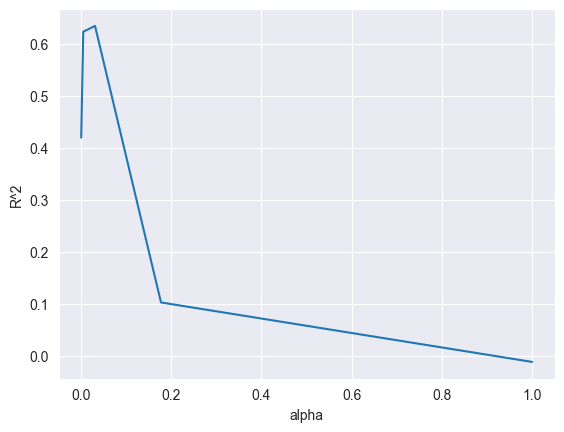

In [34]:
plt.plot(Alpha, cv_scores)
plt.xlabel('alpha')
plt.ylabel('R^2')

print('The optimal alpha is', Alpha[max_index])
print('The training score of the optimal alpha is', train.score(X_train_poly,y_train))
print('The validation score of the optimal alpha is', max_value)

plt.show()


Now, this is much better. Note that this takes some time to run. 
It would be best to now zoom in on the values around 0.03 to get the best possible value for alpha. This would again take quite some time, so for this labo, we wille stop here.

This model performs a lot better than the previous models. I would say this model is not severly overfitted nor severly underfitted.